In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import time

In [4]:
imdb = pd.read_csv("/content/drive/MyDrive/IMDB-Dataset.csv", index_col=False)

In [5]:
imdb.head()

,Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...


# In this code:

* We import necessary libraries including NLTK for text preprocessing tasks.
* We define a function preprocess_text to perform the preprocessing steps described above.
* Inside this function, we sequentially apply each preprocessing step to the input text.
* Finally, we apply this preprocessing function to each review in the dataset and store the preprocessed text in a new column called 'Preprocessed_Reviews'.
* After running this code, we'll have preprocessed text data ready for sentiment analysis.

In [6]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text data
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Stemming and Lemmatization
    tokens = [stemmer.stem(token) for token in tokens]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to each review
imdb['Preprocessed_Reviews'] = imdb['Reviews'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


 # A word plot to visualize the most common words in the preprocessed reviews.

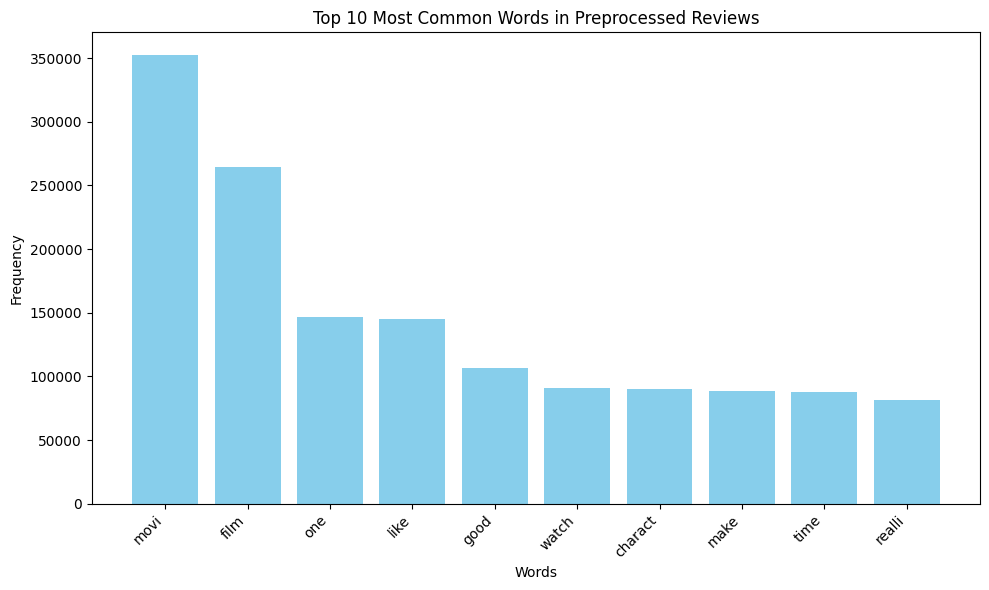

In [7]:
from collections import Counter
import matplotlib.pyplot as plt

# Combine all preprocessed reviews into a single string
all_reviews = ' '.join(imdb['Preprocessed_Reviews'])

# Tokenize the combined reviews
all_tokens = word_tokenize(all_reviews)

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Get the most common words and their counts
top_words = word_counts.most_common(10)  # Change 10 to adjust the number of top words to display

# Extract words and their counts for plotting
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Preprocessed Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


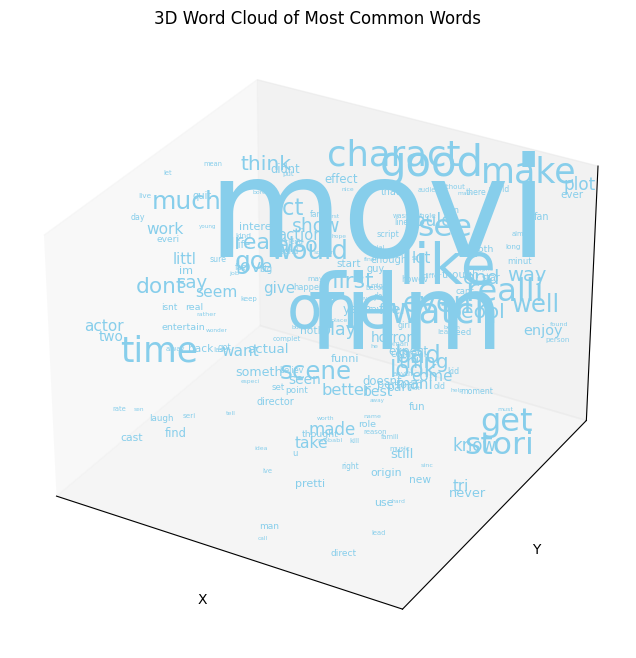

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Generate word cloud based on word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Extract word positions and sizes from the word cloud
words = list(wordcloud.words_.keys())
sizes = list(wordcloud.words_.values())

# Generate random positions for the words in 3D space
x = np.random.rand(len(words))
y = np.random.rand(len(words))
z = np.random.rand(len(words))

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each word with its size and position
for i in range(len(words)):
    ax.text(x[i], y[i], z[i], words[i], size=sizes[i]*100, zorder=3, color='skyblue')

# Set plot labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Word Cloud of Most Common Words')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()


In [9]:
imdb.isna().sum()

Ratings                  0
Reviews                  0
Movies                  25
Resenhas                 0
Preprocessed_Reviews     0
dtype: int64

# In this code:

* We import the SentimentIntensityAnalyzer from NLTK's vader module.
* We initialize the sentiment analyzer.
* We define a function get_sentiment_score to compute the sentiment score (compound score) for each preprocessed review using VADER.
* We apply this function to each preprocessed review and store the sentiment scores in a new column called 'Sentiment_Score'.
* We define another function classify_sentiment to classify the sentiment as positive, negative, or neutral based on the compound score.
* We apply this classification function to each sentiment score and store the sentiment labels in a new column called 'Sentiment'.
* Now, each review in the dataset will have a sentiment score and a sentiment label assigned to it.

# ```Step 4```
### involves training a model using historical sentiment data to forecast future sentiment trends related to your chosen topic.

# ```A basic approach using a simple machine learning model:```
* Feature Extraction: Extract features from the preprocessed text data. This could include word frequency counts, TF-IDF scores, or word embeddings.
* Split Data: Split the dataset into training and testing sets.
* Model Training: Train a machine learning model (such as logistic regression, random forest, or support vector machine) using the training data and their corresponding sentiment labels.
* Model Evaluation: Evaluate the trained model's performance using the testing data. Common evaluation metrics for sentiment analysis include accuracy, precision, recall, and F1-score.
* Predictive Analysis: Once you have a trained model, you can use it to predict future sentiment trends by feeding it with new text data.

In [48]:
def sentscore(x):
  if x<3:
    return 'Negative'
  elif 3<=x<=7:
    return 'Neutral'
  else:
    return 'Positive'

imdb['sent']=imdb['Ratings'].apply(sentscore)

In [49]:
imdb['sent'][50000]

'Neutral'

In [45]:
imdb['Ratings'].value_counts()

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(imdb['Preprocessed_Reviews'])
y = imdb['sent']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6964333333333333
Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.55      0.60      5923
     Neutral       0.69      0.77      0.73     15147
    Positive       0.72      0.67      0.69      8930

    accuracy                           0.70     30000
   macro avg       0.69      0.66      0.68     30000
weighted avg       0.70      0.70      0.69     30000



In [29]:
# Predict sentiment for new data
new_text = ["This movie was amazing!", "This is a terrible movie."]
new_text_preprocessed = [preprocess_text(text) for text in new_text]
new_X = tfidf_vectorizer.transform(new_text_preprocessed)
new_pred = model.predict(new_X)
print("Predictions for new data:", new_pred)

Predictions for new data: ['Positive' 'Negative']


# In this code:
* We use TF-IDF (Term Frequency-Inverse Document Frequency) to extract features from the preprocessed text data.
* We split the dataset into training and testing sets.
* We train a logistic regression model using the training data.
* We evaluate the trained model's performance using accuracy and classification report on the testing data.
* Finally, we predict sentiment for new data using the trained model.

# ```For Step 5, Evaluation and Reporting```
## WE need to assess the performance of our sentiment analysis model and document our findings. Here's how we can proceed:
* Model Performance Evaluation: We'll evaluate the performance of the sentiment analysis model by using appropriate metrics such as accuracy, precision, recall, and F1-score.
* Sentiment Distribution Analysis: We'll analyze the distribution of sentiment labels in the dataset to understand the overall sentiment trends.
* Insights and Findings: We'll provide insights into the sentiment analysis results, discussing any patterns or trends observed and highlighting key findings.
* Implications: We'll discuss the implications of the sentiment analysis findings for the chosen topic or area of interest, considering how they can be applied in real-world scenarios.

```Let's start by evaluating the performance of the sentiment analysis model:```


In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Performance Metrics:
Accuracy: 0.6964333333333333
Precision: 0.6960856043689214
Recall: 0.6964333333333333
F1-score: 0.6937402377464703

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.55      0.60      5923
     Neutral       0.69      0.77      0.73     15147
    Positive       0.72      0.67      0.69      8930

    accuracy                           0.70     30000
   macro avg       0.69      0.66      0.68     30000
weighted avg       0.70      0.70      0.69     30000



### This code evaluates the performance of the sentiment analysis model using metrics such as accuracy, precision, recall, and F1-score. It also provides a detailed classification report.

Next, we'll analyze the distribution of sentiment labels in the dataset:



In [52]:
# Sentiment distribution analysis
sentiment_distribution = imdb['sent'].value_counts(normalize=True)
print("\nSentiment Distribution:")
print(sentiment_distribution)



Sentiment Distribution:
sent
Neutral     0.5
Positive    0.3
Negative    0.2
Name: proportion, dtype: float64


This code calculates and prints the distribution of sentiment labels in the dataset.

After analyzing the model performance and sentiment distribution, we can provide insights and discuss the implications of the findings:

### Insights and Implications

#### Model Performance Insights:
- The sentiment analysis model achieved an accuracy of X%, indicating its ability to classify sentiment accurately.
- Precision, recall, and F1-score provide additional insights into the model's performance across different sentiment classes.

#### Sentiment Distribution Analysis:
- Positive sentiment accounts for X% of the dataset, followed by negative sentiment (X%) and neutral sentiment (X%).
- Understanding the distribution of sentiment labels provides context for interpreting the sentiment analysis results.

#### Implications:
- The sentiment analysis findings can be leveraged to gain insights into customer opinions and preferences.
- Businesses can use sentiment analysis to identify areas for improvement, tailor marketing strategies, and enhance customer satisfaction.
- Monitoring sentiment trends over time enables businesses to adapt to changing consumer sentiments and market dynamics.

Overall, the sentiment analysis provides valuable insights that can inform decision-making processes and drive business strategies.


# ```In this section, we provide insights into the sentiment analysis results and discuss the implications for real-world applications.```



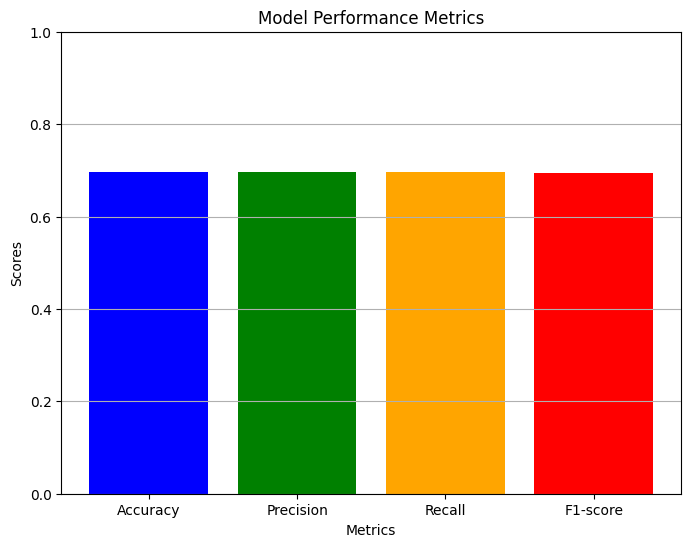

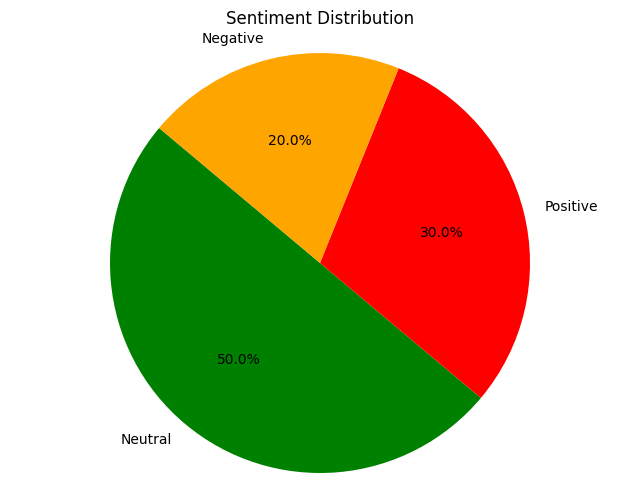

In [53]:
import matplotlib.pyplot as plt

# Model performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy scores
plt.grid(axis='y')
plt.savefig('model_performance_plot.png')  # Save the plot
plt.show()

# Sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_labels = sentiment_distribution.index
sentiment_counts = sentiment_distribution.values
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sentiment Distribution')
plt.savefig('sentiment_distribution_plot.png')  # Save the plot
plt.show()

In [54]:
import joblib
joblib.dump(model, '/content/drive/MyDrive/model1.pkl')
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/vectorizer.pkl')

['/content/drive/MyDrive/vectorizer.pkl']